### 第三章 卷积神经网络

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = tf.nn.relu))
model.add(keras.layers.Dense(10, activation = tf.nn.softmax))

In [6]:
model.compile(optimizer = tf.optimizers.Adam(), loss = tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 36s 597us/sample - loss: 0.5663 - accuracy: 0.8336
Epoch 2/5
60000/60000 [==============================] - 46s 769us/sample - loss: 0.3212 - accuracy: 0.8827
Epoch 3/5
60000/60000 [==============================] - 40s 666us/sample - loss: 0.2907 - accuracy: 0.8918
Epoch 4/5
60000/60000 [==============================] - 45s 754us/sample - loss: 0.2655 - accuracy: 0.8996
Epoch 5/5
60000/60000 [==============================] - 40s 670us/sample - loss: 0.2433 - accuracy: 0.9088


### 卷积网络结构

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

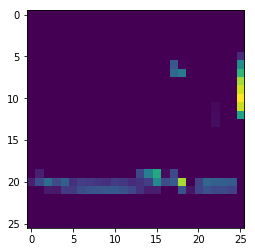

In [9]:
import matplotlib.pyplot as plt
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
pred = activation_model.predict(test_images[0].reshape(1, 28, 28, 1))
plt.imshow(pred[0][0,:,:,1])
plt.show()